<a href="https://colab.research.google.com/github/rosacarla/PowerBI-tecnicas-avancadas/blob/main/Treinamento_RNC_S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # TREINAMENTO DE REDE NEURAL COMPETITIVA (RNC)  
> CURSO: TECNOLOGIA EM INTELIGÊNCIA ARTIFICIAL APLICADA  
> DISCIPLINA: REDES NEURAIS  
> PROFESSOR: EDSON RUSCHEL (autor do código original S5_RNC.py)  
> ESTUDANTE: CARLA EDILA SILVEIRA  
> OBJETIVO: identificar grupos de elementos (veículos automotores) de acordo com Correlações identificadas entre cilindrada (medida em litros) e eficiência (medida em km/L)  
> DATA: 18/09/2023
> <img src='https://i.postimg.cc/nhy4vGZx/What-is-Deep-Learning-Large.jpg' width=880>


> ## Definição de Rede Neural Competitiva e sua arquitetura
> <p align='justify'>As Redes Neurais Competitivas (RNCs), também conhecidas como mapa auto-organizável ou rede de Kohonen, são um tipo especial de arquitetura de redes neurais artificiais que se baseiam em princípios de competição entre neurônios. São usadas para tarefas de agrupamento, classificação e reconhecimento de padrões.</p>
> </br><img align="right" src="https://i.postimg.cc/8zX6HBSc/RNC.png" width=380>
> <h6> A arquitetura da RNC é composta por três principais componentes: a <b>CAMADA DE ENTRADA</b>, a <b>CAMADA COMPETITIVA</b> e a <b>CAMADA DE SAÍDA.</h6></br>


In [1]:
# IMPORTAÇÃO DE BIBLIOTECAS

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# CRIAÇÃO DA CLASSE PARA REDE NEURAL COMPETITIVA (RNC)

class RNC:
    def __init__(self, input_shape, num_neurons):
        self.input_shape = input_shape
        self.num_neurons = num_neurons
        self.weights = np.random.rand(num_neurons, input_shape)

    def train(self, input_data, learning_rate=0.1, num_epochs=5):
        progress_bar = tqdm(total=num_epochs, desc='Treinando', unit=' épocas', ncols=80)
        for epoch in range(num_epochs):
            for input_sample in input_data:
                winner_neuron = self.get_winner_neuron(input_sample)
                self.update_weights(input_sample, winner_neuron, learning_rate)
            progress_bar.set_postfix(epoch=epoch+1)
            progress_bar.update()
        progress_bar.close()

    def get_winner_neuron(self, input_sample):
        distances = np.linalg.norm(input_sample - self.weights, axis=1)
        return np.argmin(distances)

    def update_weights(self, input_sample, winner_neuron, learning_rate):
        self.weights[winner_neuron] += learning_rate * (input_sample - self.weights[winner_neuron])

    def predict(self, input_data):
        predictions = []
        for input_sample in input_data:
            winner_neuron = self.get_winner_neuron(input_sample)
            predictions.append(winner_neuron)
        return predictions

In [3]:
# MONTAGEM DO DRIVE PARA CARREGAR DADOS

#from google.colab import drive
#drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# CARREGAMENTO DA BASE DE DADOS E SELEÇÃO DAS COLUNAS DE INTERESSE

# Carrega conjunto de dados "base_veiculos_S5.csv"
data = pd.read_csv('/content/gdrive/MyDrive/RN/base_veiculos_S5.csv')

# Extrai colunas de interesse
columns = ['Cilindrada', 'Eficiencia']
data = data[columns]

In [6]:
# CONFIGURAÇÃO DA BASE DE DADOS

# Remove linhas com valores em branco ou zero
data = data.dropna()
data = data[(data != 0).all(axis=1)]

# Converte colunas em arrays numpy
cilindrada = data['Cilindrada'].values
eficiencia = data['Eficiencia'].values

# Concatena dados combinados em um único array

# Cilindrada x Eficiência
combinacao = np.column_stack((cilindrada, eficiencia))
inshape = combinacao.shape[1]

In [136]:
# CONFIGURAÇÃO DA ESTRUTURA DA REDE NEURAL COMPETITIVA

# DEFINE QUANTIDADE DE NEURÔNIOS DA REDE
num_neur_rnc = 10

# DEFINE NÚMERO DE ÉPOCAS PARA TREINAMENTO DA REDE
epocas_rnc = 4

# DEFINE TAXA DE APRENDIZADO DA REDE
taxa_aprend_rnc = 2.0

# CONFIGURA ORDEM DO POLINÔMIO PARA REGRESSÃO LINEAR

# Ordem do Polinômio para Regressão cilindrada x efciência
ordem_pol = 4

# INFORMA PARÂMETROS PARA PREVISÃO

# Informa um valor de Cilindrada (em L) para prever a Eficiência (em Km/L)
cilindrada_info = 1.0

In [137]:
# CRIAÇÃO DA REDE NEURAL COMPETITIVA

# Criação da Rede Neural Competitiva 1
rnc = RNC(input_shape=inshape, num_neurons=num_neur_rnc)

In [138]:
# TREINAMENTO DA REDE NEURAL COMPETITIVA

# Treinamento da Rede Neural Competitiva 1
rnc.train(combinacao, learning_rate=taxa_aprend_rnc, num_epochs=epocas_rnc)

Treinando: 100%|████████████████████| 4/4 [00:02<00:00,  1.35 épocas/s, epoch=4]


In [139]:
# PREDIÇÕES DA REDE NEURAL COMPETITIVA

# Realiza predição cilindrada x kmpl
predictions = rnc.predict(combinacao)

In [140]:
# CÁLCULO DOS POLINÔMIOS DAS REGRESSÕES

# Calcula polinômio para Cilindrada X Eficiência
coefficients = np.polyfit(cilindrada, eficiencia, ordem_pol)
polynomial = np.poly1d(coefficients)

In [141]:
# GERA TABELA DE AGRUPAMENTOS (CLUSTERS)

# Tabela Cilindrada X Eficiência

table_data = {'Cil.': cilindrada,
              'Efic.': eficiencia,
              'Group': predictions}

df_table = pd.DataFrame(table_data)

grouped_table = df_table.groupby('Group').agg({'Cil.': ['min', 'max'],
                                               'Efic.': ['min', 'max'],
                                               'Group': 'size'})

grouped_table.columns = ['Cil. (min)', 'Cil. (max)', 'Efic. (min)',
                          'Efic. (max)', 'Elementos']

# Formata valores reais para 2 casas decimais
grouped_table = grouped_table.round(decimals=2)

In [142]:
# PREVISÕES DA REGRESSÃO

# Prever valor de Eficiência correspondente a Cilindrada informada
previsao_y = polynomial(cilindrada_info)
previsao_y = '{:.2f}'.format(previsao_y)

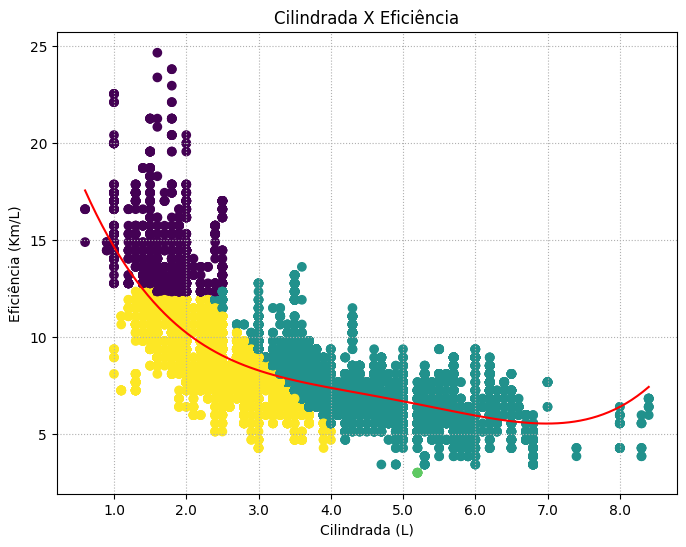

In [143]:
# PLOTAGEM DE RESULTADOS EM GRÁFICOS DE DISPERSÃO

# Cilindrada (L) X Eficiência (Km/L)

# Obtem termos do polinômio formatados
terms = []

for i, coeff in enumerate(polynomial.coeffs):
    power = polynomial.order - i
    term = f"{coeff:.2f}x^{power}" if power > 1 else f"{coeff:.2f}x" if power == 1 else f"{coeff:.2f}"
    terms.append(term)

# Constrou string da função f(x)
function_str = "f(x) = " + " + ".join(terms)

# Plota gráfico de dispersão
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(cilindrada, eficiencia, c=predictions)
ax.set_xlabel("Cilindrada (L)")
ax.set_ylabel("Eficiência (Km/L)")
ax.set_title("Cilindrada X Eficiência")
ax.set_xticks(np.arange(0, np.max(cilindrada) + 2, 1))
ax.set_xticklabels(['%.1f' % x for x in np.arange(0, np.max(cilindrada) + 2, 1)])
ax.grid(linestyle='dotted')

# Plota linha de regressão
x_values = np.linspace(np.min(cilindrada), np.max(cilindrada), 100)
y_values = polynomial(x_values)
ax.plot(x_values, y_values, color='red')

plt.show()

In [144]:
# APRESENTAÇÃO DE TABELAS COM CLUSTERS

print('\n' + '=' * 70)
print('TABELA DE AGRUPAMENTO (CLUSTERS)')
print('=' * 70)
print('\n' * 1)

# Tabela Cilindrada (L) X Eficiência (Km/L)
print("Tabela 1. Cilindrada (L) X Eficiência (Km/L)")
print('_' * 70)
print(grouped_table)
print('_' * 70)
print('\n' * 2)


TABELA DE AGRUPAMENTO (CLUSTERS)


Tabela 1. Cilindrada (L) X Eficiência (Km/L)
______________________________________________________________________
       Cil. (min)  Cil. (max)  Efic. (min)  Efic. (max)  Elementos
Group                                                             
4             0.6         2.5        12.33        24.66       1981
6             2.4         8.4         3.40        13.60      16957
7             5.2         5.2         2.98         2.98          5
8             1.0         4.0         4.25        12.33      19024
______________________________________________________________________





In [145]:
# APRESENTAÇÃO DE PREVISÕES DAS REGRESSÕES
print('\n' + '=' * 70)
print('PREVISÃO DA REGRESSÃO')
print('=' * 70)
print('\n' * 1)

# Imprime resultados da função f(x) para Cilindrada X Eficiência
print('Função polinomial para Cilindrada X Eficiência')
print('_' * 70)
print(function_str + '\n')
print("Cilindrada informada:", cilindrada_info, "L")
print("Eficiência prevista:", previsao_y, "Km/L")
print('_' * 70)
print('\n' * 1)


PREVISÃO DA REGRESSÃO


Função polinomial para Cilindrada X Eficiência
______________________________________________________________________
f(x) = 0.02x^4 + -0.49x^3 + 3.56x^2 + -12.06x + 23.61

Cilindrada informada: 1.0 L
Eficiência prevista: 14.64 Km/L
______________________________________________________________________




> ## EXECUÇÕES DO MODELO PARA OBSERVAR EFEITOS DO TREINAMENTO E PERFORMANCE
> - 1a. execução  
> Configuração da RN: num_neur_rnc = 4; epocas_rnc = 1; taxa_aprend_rnc = 2.0; ordem_pol = 1</br>  
> <img src='https://i.postimg.cc/RFnRHCNP/S5-exe1.png'></br>  
> - 2a. execução  
> Configuração da RN: num_neur_rnc = 8; epocas_rnc = 1; taxa_aprend_rnc = 2.0; ordem_pol = 1</br>  
> <img src='https://i.postimg.cc/3x9RhgJh/S5-exe2.png'></br>
> - 3a. execução  
> Configuração da RN: num_neur_rnc = 8; epocas_rnc = 2; taxa_aprend_rnc = 2.0; ordem_pol = 1</br>  
> <img src='https://i.postimg.cc/QxfCGQM3/S5-exe3.png'></br>
> - 4a. execução  
> Configuração da RN: num_neur_rnc = 8; epocas_rnc = 2; taxa_aprend_rnc = 1.0; ordem_pol = 1</br>  
> <img src='https://i.postimg.cc/zB18Rjj4/S5-exe4.png'></br>
> - 5a. execução  
> Configuração da RN: num_neur_rnc = 8; epocas_rnc = 2; taxa_aprend_rnc = 1.0; ordem_pol = 2</br>  
> <img src='https://i.postimg.cc/nhY6PJYS/S5-exe5.png'></br>





> ## DISCUSSÃO DOS RESULTADOS  

> <p align='justify'>A configuração da rede neural com estes valores numéricos: quantidade de neurônios = 10, épocas = 4, taxa de aprendizado = 2, ordem de polinômios = 4 influenciou mais no treinamento e na performance do modelo de RNC.</p>
> <p align='justify'>Nas execuções em que se manteve a ordem de polinômios com o valor numérico = 2, não houve modificação nas previsões de eficiência, pois continuaram como 11,23 km/L.</p>
> <p align='justify'>Execuções do modelo com aumentos da taxa de aprendizado para 3 e 4 geraram erros no treinamento: "<i>overflow encountered in multiply.</i>" e  "<i>invalid value encountered in add.</i>".</p>  
> <p align='justify'>Por exemplo, o aviso "<i>overflow encountered in multiply.</i>" sinaliza que houve um estouro (overflow) ao multiplicar valores durante o treinamento. Esse tipo de aviso pode indicar que os valores numéricos no treinamento da rede ficaram muito grandes.</p>
> <p align='justify'>O segundo aviso "<i>invalid value encountered in add.</i>" informa que um valor inválido foi encontrado durante a operação de adição. Essa falha pode ser causada também pelo aumento  excessivo dos valores numéricos da rede.</p>  